## Weeks and scores

This notebook studies the relation between week number and model log scores without any fancy modelling.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
sys.path.append("../src/")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import utils

In [4]:
data_file = "../data/processed/stacking-data.h5"
df = pd.read_hdf(data_file, "data")
scores = df.columns.levels[0]

## Mean values of scores

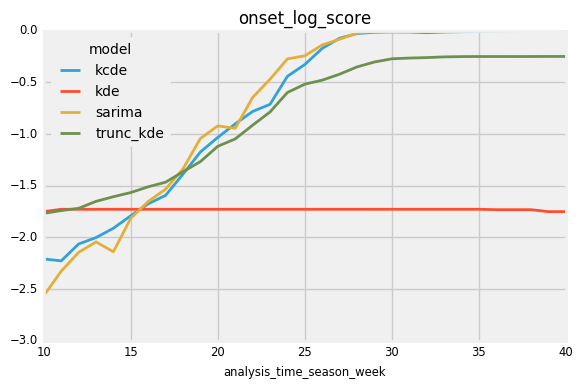

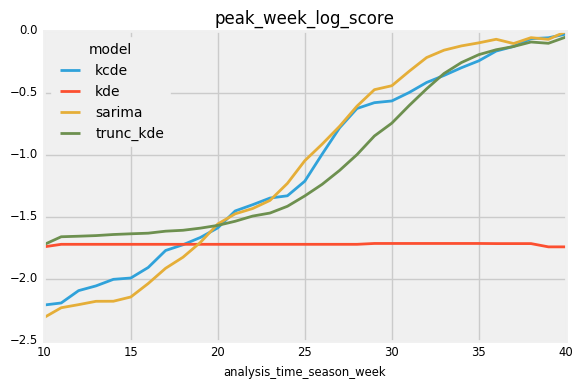

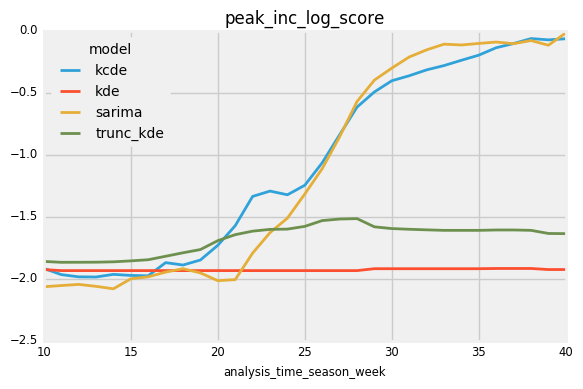

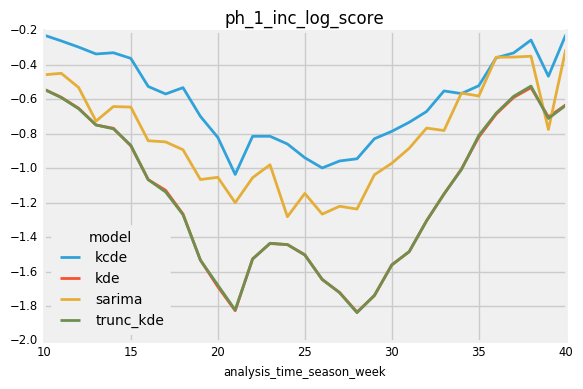

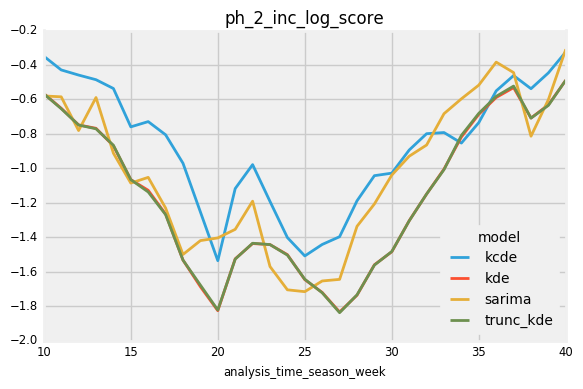

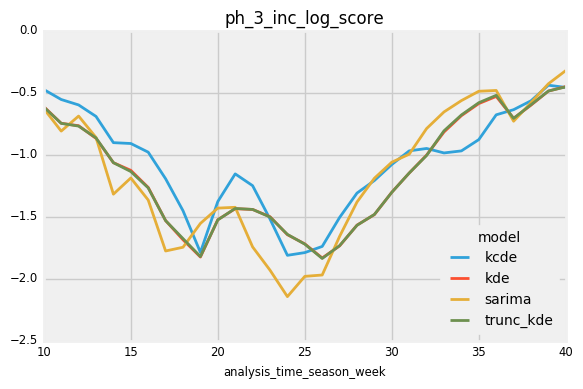

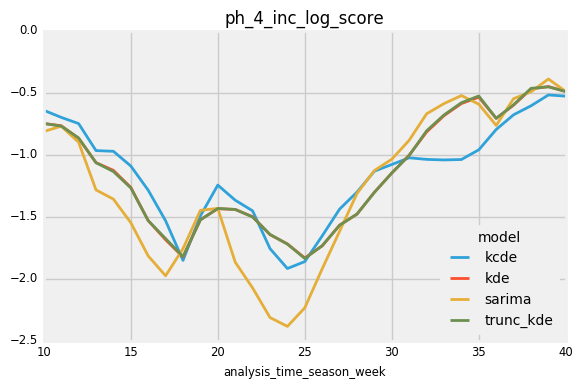

In [6]:
for score in scores:
    means = df[score].reset_index().groupby("analysis_time_season_week").mean()
    means.plot()
    plt.title(score)

## Softmax weights

With variable beta

ValueError: x and y must have same first dimension

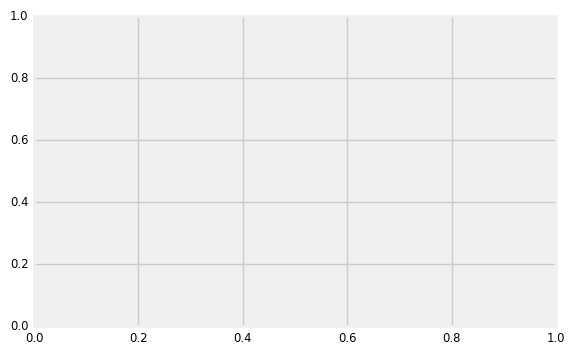

In [11]:
beta = 2

for score in scores:
    weeks = np.arange(10, 40) # Only these weeks are available
    weights = df[score].reset_index().groupby("analysis_time_season_week").mean().as_matrix()
    weights = np.exp(beta * weights)
    
    weights = weights / weights.sum(axis=1, keepdims=True)

    for idx, label in enumerate(df["onset_log_score"].columns):
        plt.plot(weeks, weights[:, idx], label=label)
    plt.legend(loc="upper left")
    plt.xlabel("Week Number")
    plt.title("Softmax weights for " + score)
    plt.show()